**Final Project Title: Brain Tumor Detection and Classification Using Convolutional Neural Networks**

The main purpose of this project is to develop an automated and accurate system for early detection and classification of brain tumors from medical images, leveraging advanced deep learning techniques like Convolutional Neural Networks (CNNs). Basically, it is an AI-powered solution that can revolutionize the brain tumor diagnosis process, leading to better patient care, and improved healthcare efficiency.

In this project, I have developed a Python-based solution that leverages deep learning techniques, specifically Convolutional Neural Networks or CNNs, to accurately detect and classify brain tumors from medical images. My primary objectives were to differentiate between normal and cancerous brain cells and further classify different types of tumors, to help medical professionals in streamlining the diagnosis process.

As we all know, Brain tumors are abnormal growths that pose severe health risks, making early detection and accurate classification crucial for effective treatment and improved patient outcomes. Traditional manual analysis methods can be time-consuming, subjective, and prone to errors, highlighting the need for automated and advanced computational techniques like deep learning.


**Proposed Solution:**

My proposed solution consists of two main components. First, a binary classification model to detect the presence of a brain tumor from MRI images. Second, a multi-class classification model to identify the specific type of tumor, such as glioma, meningioma, or pituitary tumors.

For the brain tumor detection task, I have utilized a dataset containing 98 normal and 155 tumor brain MRI images. For tumor classification, our dataset had 2,870 training images and 394 testing images across four classes.


**Mounting Google Drive:**

Firstly, when working with Google Colab and needing to access files stored in our Google Drive. This step ensures that our Google Drive is accessible within the Colab environment, enabling us to read and write data, load models, and perform other file-related operations seamlessly.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Brain Tumor Detection - Binary Classification:**

In [ ]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

**Loading the medical image data:**

I have given access to my drive for the required folders for running this code. Please click on the below links to connect to my drive:

normal_path: https://drive.google.com/drive/folders/1-4hRaG-DsX8tszwSN5VzGBwPixRJVysM?usp=sharing

tumor_path: https://drive.google.com/drive/folders/1xGArtE3dQEYw8KScD4LtnhzFaaM35yUq?usp=sharing

Training_MRI: https://drive.google.com/drive/folders/1ELlHaAYzerVc6KX-NEz0QaGO107YBYa-?usp=sharing

Testing_MRI: https://drive.google.com/drive/folders/13OGRb00yRTFrrteK2gtHzIsG95HYVsPY?usp=sharing

In [ ]:
# Setting paths for normal and tumor brain cell images
normal_path = '/content/drive/MyDrive/normal'
tumor_path = '/content/drive/MyDrive/tumor'

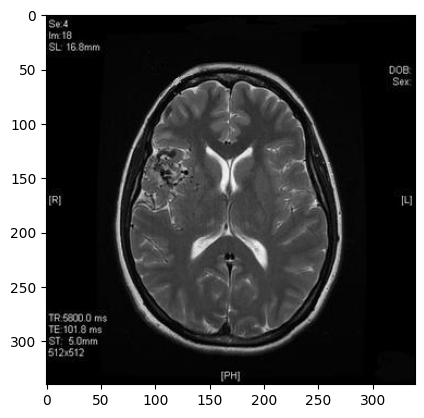

In [ ]:
import matplotlib.image as mpimg

# Displaying a normal brain image
normal_brain = plt.imshow(mpimg.imread('/content/drive/MyDrive/normal/No14.jpg'))

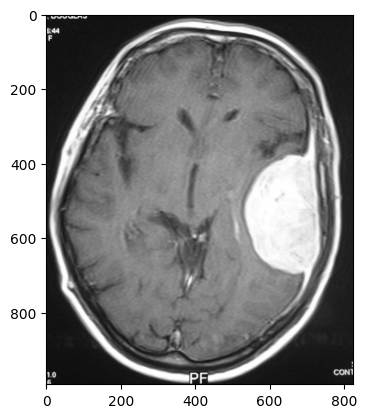

In [ ]:
# Displaying a cancerous brain image
tumor_brain = plt.imshow(mpimg.imread('/content/drive/MyDrive/tumor/Y103.jpg'))

**Data Preparation and Image Processing​:**

Here, we are loading and preprocessing the brain MRI images from the respective directories, resizing them to a consistent size (128x128 pixels) and converting them to RGB format before further processing or training the neural network models.

The resulting normal_images and tumor_images lists will contain NumPy arrays representing the preprocessed normal and tumor brain images, respectively, which can then be used for training or evaluation purposes.

In [ ]:
# Loading and preprocessing images
normal_images = []
tumor_images = []

In [ ]:
# Creating a for loop iterate over the brain image files in the normal_path
for img_file in os.listdir(normal_path):
    image = Image.open(os.path.join(normal_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    normal_images.append(np.array(image))

# Creating a for loop iterate over the brain image files in the tumor_path
for img_file in os.listdir(tumor_path):
    image = Image.open(os.path.join(tumor_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    tumor_images.append(np.array(image))

In [ ]:
# Printing the number of normal brain images
print(f"Number of normal brain images: {len(normal_images)}")

# Printing the number of cancerous brain images
print(f"Number of cancerous brain images: {len(tumor_images)}")

Number of normal brain images: 98
Number of cancerous brain images: 155


In [ ]:
# Creating labels as: 0 for normal brain and 1 for cancerous brain
normal_labels = [0] * len(normal_images)
tumor_labels = [1] * len(tumor_images)
labels = normal_labels + tumor_labels
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


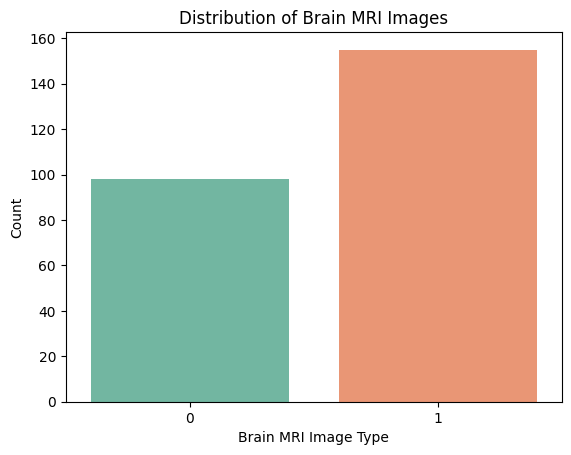

In [ ]:
# Displaying the number of images
import seaborn as sns

sns.countplot(x=labels, palette="Set2")
plt.xlabel('Brain MRI Image Type')
plt.ylabel('Count')
plt.title('Distribution of Brain MRI Images')
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Converting data to numpy arrays
data = np.array(normal_images + tumor_images)
labels = np.array(labels)

In [ ]:
# Checking and printing the type (if it is numpy array)
print(type(normal_images[0]))
print(type(tumor_images[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Printing the length of the numpy array
print(data.shape)
print(labels.shape)

(253, 128, 128, 3)
(253,)


In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=101)

In [ ]:
# Normalizing pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

**Building a CNN Model - For Binary Classification (Tumor Detection):**

For the brain tumor detection task, I built a convolutional neural network from scratch. The model architecture consists of multiple convolutional layers that extract important features from the input images. These are followed by max-pooling layers that downsample the feature maps, reducing computational complexity.
The extracted features are then flattened and fed into dense, or fully connected, layers. These layers perform the actual classification by learning the complex mappings between the input features and the output labels: normal or tumor.
I trained this model using the Adam optimization algorithm and binary cross-entropy loss function for 50 epochs on my dataset of normal and tumor brain MRI images.


In [ ]:
# Building the CNN model
CNN_model = Sequential()
CNN_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compiling the built model
CNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model
CNN_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
7/7 [==============================] - 16s 2s/step - loss: 0.9219 - accuracy: 0.6535 - val_loss: 0.5362 - val_accuracy: 0.7451
Epoch 2/50
7/7 [==============================] - 11s 2s/step - loss: 0.4753 - accuracy: 0.7970 - val_loss: 0.5163 - val_accuracy: 0.7647
Epoch 3/50
7/7 [==============================] - 13s 2s/step - loss: 0.4530 - accuracy: 0.8168 - val_loss: 0.4468 - val_accuracy: 0.8627
Epoch 4/50
7/7 [==============================] - 11s 2s/step - loss: 0.3240 - accuracy: 0.8614 - val_loss: 0.4996 - val_accuracy: 0.7843
Epoch 5/50
7/7 [==============================] - 13s 2s/step - loss: 0.2467 - accuracy: 0.9010 - val_loss: 0.4020 - val_accuracy: 0.8824
Epoch 6/50
7/7 [==============================] - 11s 2s/step - loss: 0.1358 - accuracy: 0.9604 - val_loss: 0.3972 - val_accuracy: 0.9216
Epoch 7/50
7/7 [==============================] - 10s 1s/step - loss: 0.0950 - accuracy: 0.9604 - val_loss: 0.4286 - val_accuracy: 0.8824
Epoch 8/50
7/7 [==================

In [ ]:
# Evaluating the model's performance
test_loss, test_acc = CNN_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Test accuracy: 90.20%


In [ ]:
# Creating a function to predict brain tumor from an image
def predict_tumor(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (128, 128))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = CNN_model.predict(image)
    plt.imshow(mpimg.imread(image_path))
    if prediction > 0.5:
        print('Tumor detected')

    else:
        print('Normal brain cell')

1/1 [==============================] - 0s 147ms/step
Tumor detected


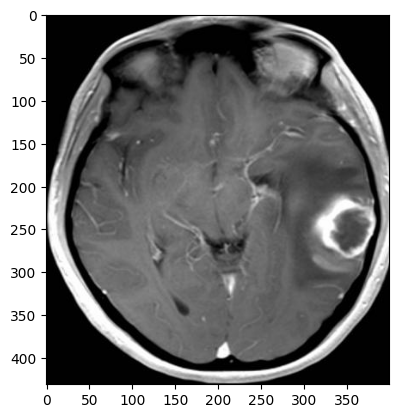

In [ ]:
# Executing the prediction function (for cancercous brain cells)
predict_tumor('/content/drive/MyDrive/tumor/Y154.jpg')


1/1 [==============================] - 0s 55ms/step
Normal brain cell


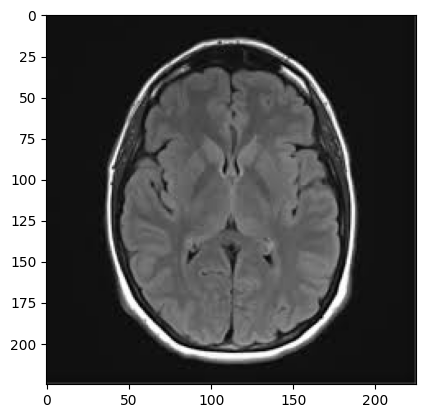

In [ ]:
# Executing the prediction function (for normal brain cells)
predict_tumor('/content/drive/MyDrive/normal/no 923.jpg')

**Brain Tumor Type Classification - Multi-class Classification:**

In [ ]:
# Importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
from warnings import filterwarnings

In [ ]:
# Suppress warnings
filterwarnings('ignore')

In [ ]:
# Defining the labels for the different tumor types
labels = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

In [ ]:
# Setting the image size for resizing
image_size = 150

In [ ]:
# Loading the training and testing data (MRI images)
X_train, y_train = [], []
for label in labels:
    train_folder = os.path.join('/content/drive/MyDrive/Training_MRI', label)
    for img_file in tqdm(os.listdir(train_folder)):
        img_path = os.path.join(train_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(label)

    test_folder = os.path.join('/content/drive/MyDrive/Testing_MRI', label)
    for img_file in tqdm(os.listdir(test_folder)):
        img_path = os.path.join(test_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(label)


100%|██████████| 105/105 [00:01<00:00, 103.22it/s]


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

Text(0.5, 1.0, 'Different types of Tumors')

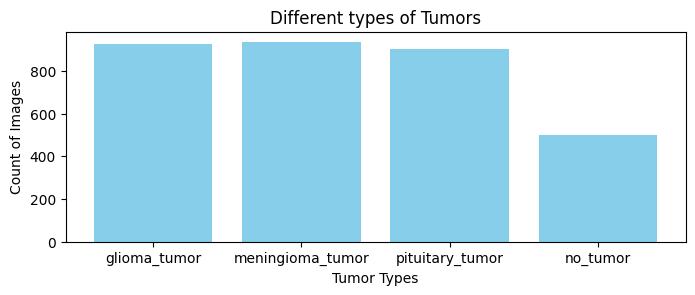

In [ ]:
# Visualizing the images in the dataset
label_counts = {label: np.sum(y_train == label) for label in labels}
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
bars = plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.ylabel('Count of Images')
plt.xlabel('Tumor Types')
plt.title('Different types of Tumors')

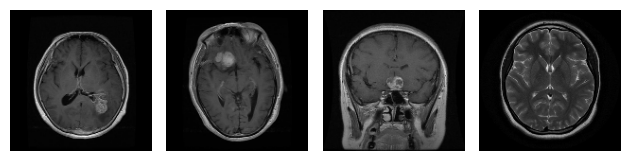

['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']


In [ ]:
# Displaying sample images from each label or each type of Brain MRI
k = 0
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            plt.subplot(2, 4, k + 5)
            plt.imshow(X_train[j])
            plt.axis('off')
            k += 1
            break
        j += 1
plt.tight_layout()
plt.show()
print(labels)

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, random_state=101)

In [ ]:
print(f"Shape of y_train before one-hot encoding: {y_train.shape}")
print(f"Shape of y_test before one-hot encoding: {y_test.shape}")

Shape of y_train before one-hot encoding: (2937,)
Shape of y_test before one-hot encoding: (327,)


In [ ]:
# Replacing string labels with integers in y_train and y_test

y_train = np.where(y_train == 'glioma_tumor', 0, y_train)
y_train = np.where(y_train == 'meningioma_tumor', 1, y_train)
y_train = np.where(y_train == 'pituitary_tumor', 2, y_train)
y_train = np.where(y_train == 'no_tumor', 3, y_train)
# Converting labels to integers
y_train = y_train.astype(int)


y_test = np.where(y_test == 'pituitary_tumor', 0, y_test)
y_test = np.where(y_test == 'glioma_tumor', 1, y_test)
y_test = np.where(y_test == 'meningioma_tumor', 2, y_test)
y_test = np.where(y_test == 'no_tumor', 3, y_test)
# Converting labels to integers
y_test = y_test.astype(int)


# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
num_classes = 4 # Replace with the actual number of classes
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

In [ ]:
print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")

Shape of y_train after one-hot encoding: (2937, 4, 4)
Shape of y_test after one-hot encoding: (327, 4, 4)


**Building the CNN1 Model - Brain Tumor Type Classification (Multi-class Classification):**

 I have employed a more advanced CNN model based on the EfficientNetB0 architecture with transfer learning. I added dense layers and dropout for classification. During training, I utilized callbacks for early stopping, learning rate reduction, and model checkpointing, achieving high confidence scores on test images.

For the more challenging task of brain tumor classification, I had to take a different approach. Instead of training a CNN from scratch, which requires a massive amount of data, I leveraged transfer learning. So I used the EfficientNetB0 model, pre-trained on a large image dataset, as my base model.

I then added custom dense layers on top of the pre-trained model and fine-tuned the whole network for our specific task of classifying tumor types like glioma, meningioma, pituitary, and no tumor.

To prevent overfitting, I incorporated techniques like dropout regularization and employed callbacks for early stopping and learning rate reduction during training. This multi-class classification model achieved high confidence scores and accurate predictions on test dataset.

In [ ]:
# Defining the CNN model
CNN1_model = Sequential()
CNN1_model.add(tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3)))
CNN1_model.add(GlobalAveragePooling2D())
CNN1_model.add(Dense(1024, activation='relu'))
CNN1_model.add(Dropout(0.4))
CNN1_model.add(Dense(len(labels), activation='softmax'))

In [ ]:
# Adding a Dense layer with the appropriate number of units to match the number of classes
CNN1_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Compiling the defined model
CNN1_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Setting up callbacks
tensorboard = TensorBoard(log_dir='logs')
checkpoint = ModelCheckpoint("model.h5", monitor="val_accuracy", save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=2, min_delta=0.0001, verbose=1)

In [ ]:
# Checking the shape of the training data
print(X_train.shape)

# If the shape is incorrect, then reshaping the data
X_train = X_train.reshape((-1, image_size, image_size, 3))

(2937, 150, 150, 3)


In [ ]:
# Checking the shape of the target variable
print(y_train.shape)

# If the shape is incorrect, then reshaping the data
y_train = y_train.reshape((-1, len(labels)))

(2937, 4, 4)


In [ ]:
# Training the model
CNN1model_fitting = CNN1_model.fit(X_train, y_train, validation_split=0.1, epochs=12, verbose=1, batch_size=32, callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/12
83/83 [==============================] - ETA: 0s - loss: 0.6739 - accuracy: 0.6947
Epoch 1: val_accuracy improved from -inf to 0.74150, saving model to model.h5
83/83 [==============================] - 480s 5s/step - loss: 0.6739 - accuracy: 0.6947 - val_loss: 0.5959 - val_accuracy: 0.7415 - lr: 0.0010
Epoch 2/12
83/83 [==============================] - ETA: 0s - loss: 0.5965 - accuracy: 0.7314
Epoch 2: val_accuracy improved from 0.74150 to 0.75170, saving model to model.h5
83/83 [==============================] - 369s 4s/step - loss: 0.5965 - accuracy: 0.7314 - val_loss: 0.5870 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 3/12
83/83 [==============================] - ETA: 0s - loss: 0.5722 - accuracy: 0.7435
Epoch 3: val_accuracy did not improve from 0.75170
83/83 [==============================] - 378s 5s/step - loss: 0.5722 - accuracy: 0.7435 - val_loss: 0.6224 - val_accuracy: 0.7517 - lr: 0.0010
Epoch 4/12
83/83 [==============================] - ETA: 0s - loss: 0.5450 - ac

In [ ]:
# Plotting the training and validation accuracy

plt.subplot(1, 2, 2)
plt.plot(CNN1model_fitting.history['accuracy'], label='Train Accuracy')
plt.plot(CNN1model_fitting.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**Evaluating the model's performance:**

I am evaluating the performance of the trained CNN model on the test set and making predictions on a randomly selected test image by computing the true labels and predicted labels for the test set. It selects a random test image, makes a prediction using the model, interprets the prediction by comparing it with the actual label, and displays the prediction information along with the image itself.

In [ ]:
# Evaluating the model on the test set
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(CNN1_model.predict(X_test), axis=1)

11/11 [==============================] - 20s 1s/step


In [ ]:
# Making a prediction on a random test image
random_index = np.random.randint(0, len(X_test))
random_img = X_test[random_index]
predictions = CNN1_model.predict(random_img.reshape(1, image_size, image_size, 3))

1/1 [==============================] - 0s 93ms/step


In [ ]:
# Interpreting the prediction
predicted_class = np.argmax(predictions)
predicted_label = labels[predicted_class]
confidence = predictions[0][predicted_class]
actual_index = y_test[random_index]
actual_class = np.argmax(actual_index)
actual_label = labels[actual_class]

Predicted label: glioma_tumor
Actual label: glioma_tumor
Confidence: 99.94%


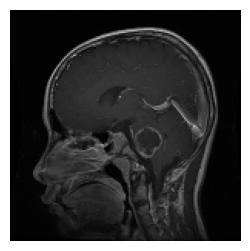

In [ ]:
# Displaying the MRI image and prediction information
print(f"Predicted label: {predicted_label}")
print(f"Actual label: {actual_label}")
print(f"Confidence: {confidence*100:.2f}%")
plt.figure(figsize=(3, 3))
plt.imshow(random_img)
plt.axis('off')
plt.show()

**Research Findings:**

My research findings highlight the effectiveness of CNNs in both brain tumor detection and classification tasks. The proposed solution achieved promising results in distinguishing normal from cancerous brain cells and classifying tumor types. Transfer learning techniques, like using pre-trained models, improved the classification performance. Additionally, data preprocessing steps were crucial for effective model training and performance.




**Conclusion:**

Here, my  proposed solution offers several benefits, including accurate and efficient analysis of medical images, streamlining the diagnosis process for early detection, reducing manual effort and associated costs, providing objective and consistent classification, and ultimately improving patient outcomes.

However, I acknowledge some drawbacks and challenges, such as limited dataset size, and potential class imbalance. Additionally, the interpretability of deep learning models can be a concern, and deployment and integration into existing healthcare systems pose challenges.

To address these challenges and further enhance our solution, I would recommend exploring advanced data augmentation techniques, handling class imbalance, incorporating ensemble methods, employing explainable AI for interpretability, integrating with electronic health records and other medical data sources, and implementing deployment strategies like cloud or edge computing.

To conclude, I would say this project demonstrates the potential of Convolutional Neural Networks for automated brain tumor detection and classification, offering a significant leap in aiding medical diagnosis and treatment planning. While challenges exist, I believe ongoing research and enhancements are further improving accuracy, robustness, and interpretability, leading to better patient outcomes and more efficient healthcare systems. This project is crucial where accurate and timely brain tumor diagnosis is within reach, empowering medical professionals to provide the best possible care and improving countless lives.

